# MNIST with Keras high-level language (Sequential model)

## Define dense layers

In [1]:
num_classes = 10 # ten handwritten digits (0 to 9) to classify

In [2]:
from keras.layers import Dense, Activation

Dense(units=num_classes, # number of output neurons
      activation = None, # activation function by name
      use_bias = True, # use bias term or not
      kernel_initializer = 'glorot_uniform',
      bias_initializer = 'zeros')

Using TensorFlow backend.


## Define dropout layers

In [3]:
from keras.layers import Dropout

rate = 0.2 # dropout rate 0 to 1

Dropout(rate,  # fraction of units to drop
       seed = None) # random seed for reproducibility

## Imports and loading data

In [4]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout, Dense

batch_size = 128
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data preprocessing

In [5]:
x_train = x_train.reshape(60000, 784) # 60000 pictures, 28*28 pixels
x_test = x_test.reshape(10000, 784) # 10000 pictures, 28*28
x_train = x_train.astype('float32') # used to be integer greysacle, now needs to be float when converted 0 to 1
x_test = x_test.astype('float32') # used to be integer greysacle, now needs to be float when converted 0 to 1
x_train /= 255 # normalize greyscale 0 to 255 to values 0 to 1
x_test /= 255 # normalize greyscale 0 to 255 to values 0 to 1

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# check vector sizes
print('\nx_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('\nx_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (60000, 784)
y_train shape: (60000, 10)

x_test shape: (10000, 784)
y_test shape: (10000, 10)



## Defining and compiling the model

In [6]:
from keras.optimizers import SGD # Stochastic Gradient Descent
from keras.utils.vis_utils import plot_model
import pydot

# define model layers
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,))) # first layer only
model.add(Dropout(rate))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(rate))
model.add(Dense(num_classes, activation = 'softmax')) # output layer with 10 endpoints and softmax probability (0 to 1)

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # lr = learning rate , decay = earning rate decay over each update
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# not so nice model representation
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

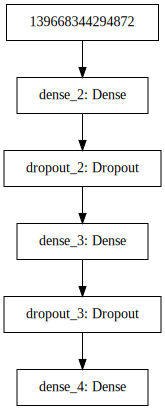

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# graphical representation of model layers saved to file. For some reason the show_shapes does not work.
plot_model(model, to_file='model_plot.png', show_shapes=True)

# show graph
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Running and evaluating

In [8]:
# Run model and save values in history variable
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Show final score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.4805 - acc: 0.8629 - val_loss: 0.2198 - val_acc: 0.9363
Epoch 2/20
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2215 - acc: 0.9355 - val_loss: 0.1541 - val_acc: 0.9532
Epoch 3/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1629 - acc: 0.9521 - val_loss: 0.1227 - val_acc: 0.9620
Epoch 4/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1336 - acc: 0.9601 - val_loss: 0.1048 - val_acc: 0.9676
Epoch 5/20
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1114 - acc: 0.9672 - val_loss: 0.0923 - val_acc: 0.9712
Epoch 6/20
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0985 - acc: 0.9708 - val_loss: 0.0836 - val_acc: 0.9739
Epoch 7/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

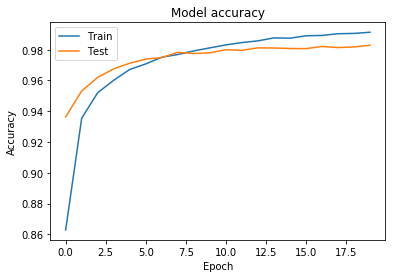

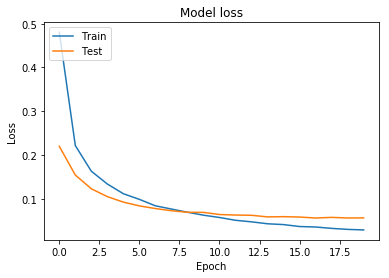

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()